In [2]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

In [6]:
#Parámetros 

k= 5.
l= 3.
m= 2.
g= 9.81
r0= 15.
theta0= np.pi/8.
rp0= 0 
thetap0= 0 

ci=[r0, theta0, rp0, thetap0]

In [8]:
#Sistema de ecuaciones

def ec1(r,theta,thetap):
    return (k/m)*(l-r) + g*np.cos(theta) + r*(thetap**2)

def ec2(r,theta, rp, thetap):
    return (-g/r)*np.sin(theta) - (2/r)*rp*thetap

In [64]:
#Euler para primer tiempo 

r1 = r0 + (0.001 * rp0)
theta1 = theta0 +  (0.001* thetap0)

rp1 = rp0 + (0.001 * ec1(r1, theta1, thetap0))
thetap1 = thetap0 + (0.001* ec2(r1, theta1, rp1, thetap0))

ci2= [r1, theta1, rp1, thetap1]


[15.0, 0.39269908169872414, -0.020936741786064274, -0.00025027496476676874]


In [128]:
def beeman_integrator(ci, ci2, ti, tf, h=0.015):
    
    N= int((tf-ti)/h) + 1
    t= np.linspace(ti,tf,N)
    
    r = np.zeros([N])
    theta = np.zeros([N])
    rp = np.zeros([N])
    thetap = np.zeros([N])
    
    r[0]=ci[0]
    theta[0]= ci[1]
    rp[0]= ci[2]
    thetap[0]= ci[3]
    
    r[1]= ci2[0]
    theta[1]= ci2[1]
    rp[1]= ci2[2]
    thetap[1]= ci2[3]
    
    for i in tqdm(range(1, N-1)):
        
        r[i+1]= r[i] + (h*rp[i]) + (1./6.)*((4*ec1(r[i],theta[i], thetap[i])) - ec1(r[i-1],theta[i-1], thetap[i-1]))*(h**2)
        theta[i+1]= theta[i] + (h*thetap[i]) + (1./6.)*((4*ec2(r[i],theta[i], rp[i], thetap[i])) - ec2(r[i-1],theta[i-1], rp[i-1], thetap[i-1]))*(h**2)
        
        #rp[i+1]= rp[i] + 0.5*((3*ec1(r[i],theta[i], thetap[i])) - ec1(r[i-1],theta[i-1], thetap[i-1]))*h
        #thetap[i+1]= thetap[i] + 0.5*((3*ec2(r[i],theta[i], rp[i], thetap[i])) - ec2(r[i-1],theta[i-1],rp[i-1], thetap[i-1]))*h
        
        rp[i+1]= rp[i] + (1./12.)*((5*ec1(r[i+1],theta[i+1], thetap[i+1])) + (8*ec1(r[i],theta[i], thetap[i])) - ec1(r[i-1],theta[i-1], thetap[i-1]))*h
        thetap[i+1]= thetap[i] + (1./12.)*((5*ec2(r[i+1],theta[i+1],rp[i+1],thetap[i+1])) + (8*ec2(r[i],theta[i],rp[i], thetap[i])) - ec2(r[i-1],theta[i-1],rp[i-1], thetap[i-1]))*h
        
    return t, r, theta, rp, thetap


In [129]:
t, r, theta, rp, thetap = beeman_integrator(ci, ci2, 0, 30)

100%|██████████| 1999/1999 [00:00<00:00, 15406.66it/s]


In [130]:
tr=[]
rr=[]
thetar=[]
rpr=[]
thetapr=[]

for i in range(len(t)):
    if i % 20 ==0:
        tr.append(t[i])
        rr.append(r[i])
        thetar.append(theta[i])
        rpr.append(rp[i])
        thetapr.append(thetap[i])
t = np.array(tr)
r = np.array(rr)
theta = np.array(thetar)
rp =  np.array(rpr)
thetap=np.array(thetapr)

In [131]:
print(r)
print(theta)

[ 1.50000000e+01  1.41587982e+01  1.16654432e+01  8.09805494e+00
  4.31437891e+00  1.32098176e+00  2.08038629e-01  1.80374888e+00
  5.07658101e+00  8.97320190e+00  1.25269837e+01  1.48951506e+01
  1.55173011e+01  1.42292910e+01  1.12955210e+01  7.35028435e+00
  3.26453316e+00  1.23908235e-02 -3.01268781e+02 -5.87489385e+02
 -7.44186839e+02 -7.36755303e+02 -5.66834478e+02 -2.71946228e+02
  8.29498881e+01  4.20239314e+02  6.64559432e+02  7.61952321e+02
  6.90910509e+02  4.67120456e+02  1.39998936e+02 -2.18771284e+02
 -5.29886268e+02 -7.24182402e+02 -7.58756569e+02 -6.25974456e+02
 -3.55156276e+02 -6.10297560e+00  3.44185035e+02  6.18294920e+02
  7.55691513e+02  7.26036275e+02  5.35878287e+02  2.27208927e+02
 -1.32070650e+02 -4.62995267e+02 -6.91875132e+02 -7.68170407e+02
 -6.75034629e+02 -4.33034534e+02 -9.56107029e+01  2.63438490e+02
  5.64513251e+02  7.40754458e+02  7.53243902e+02  5.99224992e+02
  3.12711942e+02 -4.31518700e+01 -3.92132172e+02 -6.54751108e+02
 -7.72991767e+02 -7.20744

<IPython.core.display.Javascript object>


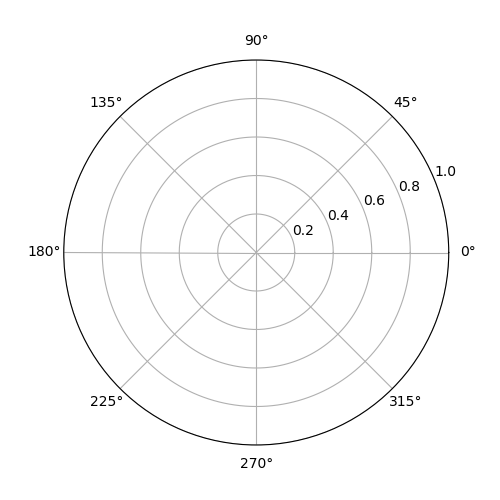

In [113]:
#Animacion

fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111, polar= True)

def Update(i):
    plot= ax.clear()
    ax.scatter(theta, r)
    return plot

In [126]:
x= r* np.cos(theta- (np.pi/2))
y= r* np.sin(theta- (np.pi/2))

<IPython.core.display.Javascript object>


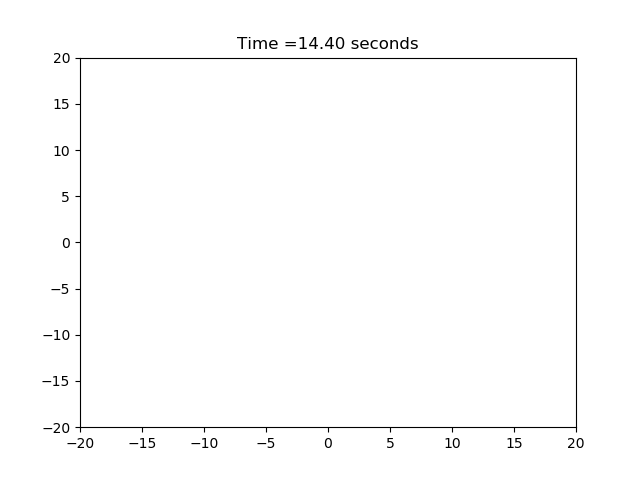

In [127]:
fig2= plt.figure()
ax2= fig2.add_subplot(1,1,1)

def init():
    
    ax2.set_xlim([-20.,20.])
    ax2.set_ylim([-20.,20.])
    
def Update(i):
    plot= ax2.clear()
    init()
    plot= ax2.set_title("Time =%.2f seconds" %(t[i]))
    circulo= plt.Circle((x,y), 2., fill= True, color="k")
    
    plot = ax2.add_patch(circulo)
    plot= ax2.arrow((0,0),(x,y),color="r", head_width=1.0)
     
    return plot
   
Animation= anim.FuncAnimation(fig2,Update,frames=len(t), init_func=init)

In [96]:
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=10, metadata=dict(artist='Me'))
Animation.save('oscilador.mp4', writer=writer_)

ValueError: setting an array element with a sequence.